# **INF111-INF112 Project Assignment - Python implementation**

_Last updated: 29 November 2023_

This Jupyter notebook outlines the implementation requirements for the Python implementation part of your INF111-INF112 practical project.

## The notebook is broken up into four sections:

1. **Required functions** -- The Python functions and functionality you are required to implement as part of your programming project.
2. **Your implementation** -- Space for you to add your own implementation to this notebook.
3. **Summary report generation** -- Base implementation for generating the summary report from your data, **with space for you to add your own implementation _(see details in section)_**.
4. **Automated testing** -- Unit tests to verify that your implementation of the required functions is valid.

### **NOTE** that to accomplish the goals of your project, you may need to implement functions that are not specified in this notebook.

### The task of a programmer is to take a _specification_, which describes the behaviour a program should implement, and write the code required to produce that behaviour.

### For full details of the expected behaviour and implementation standards, please refer to the [INF111-INF112 Project Assignment Brief](https://docs.google.com/document/d/1ajALWwIqV49aiv3wtLK1lqv2ObKwWIqmnUfR6c4B5rQ/edit?usp=sharing).


---

## **For INF111 Mid-Semester Check-in 2 (Week 9)**:

- You are free to use your example CSV file from your Mid-Semester Check-in 1 submission (or a modified version of it) as your data source. **You are not required to submit a SQL file for INF111 Check-in 2.**
- Please submit your _**in-progress**_ copy of this Jupyter notebook to the TurnItIn link on INF111 Blackboard.
- You are not required to meet any specific milestones for your Check-in 2 submission, however the more code you submit the more you will be able to get feedback on.

## **For INF111-INF112 final submission (Week 12)**:

- **For final submission you are required to use your SQLite database file for all data storage and retrieval.**
- Your Jupyter notebook must assume that your SQLite database file is stored in the same working directory as the notebook file.
- Please submit your _**completed**_ copy of this Jupyter notebook to the TurnItIn link on INF111 Blackboard.
- Please submit your SQLite database file to the TurnItIn link on INF112 Blackboard.

---
---
# **Section 1: Required functions**

This section provides information about the
 **minimum set of functions/functionality required** for your project submission.

The required functions are split into two sections:

1. **Automated testing applied:** functions which the unit tests in the "Automated testing" section at the end of this notebook are designed to test.
2. **No automated testing applied:** functions which will not be automatically tested to verify their behaviour, but will be read during marking.

---
## Automated testing applied

Methods in this section will be subject to automated testing using the unit tests defined in the "Automated testing" section of this notebook.

### **The specification (name, input, and output) of these methods must not be changed or the automated testing will fail.**

### **NOTE** You are free to implement these functions directly in the code blocks in this section or in your own code elsewhere in the notebook.

### helper function for automated tested functions
*other helper function (executeQuery and getColumnsName) are used too, but implemented in next section.

In [1]:
def getColumnsValues(data_file, columns_map):
  '''this is a helper function takes columns_map that contains mapping of columns
  of some columns and returns a dictionary where the keys are column names and
  the values are lists containing the column values'''
  #set up a dictionaty to store the columns values in
  result_dict = {}
  for columns in columns_map.values():
    for column in columns:
      result_dict[column] = []
  #go through each table
  for table, columns in columns_map.items():
    #get the values for the tables column
    fetchall = executeQuery(data_file, f"SELECT {', '.join(columns)} FROM {table}")
    #go through each row and store its values in result_dict according to the index(column name)
    for row in fetchall:
      for i, value in enumerate(row):
        result_dict[columns[i]].append(value)
  return result_dict

### `getNumericColumns`

This function must return a **dictionary** where:

- **Dictionary keys** are the names of columns with **real-valued** data;
- **Dictionary values** are lists of values from those columns

This function must return a **single dictionary containing the numeric columns from ALL tables in your database combined**.

In [2]:
def getNumericColumns(data_file):
  '''this function returns a dictionary with all numeric columns and their values'''
  numeric_columns_map = {'Luggage': ['luggage_tag_id', 'weight_kg']}
  return getColumnsValues(data_file, numeric_columns_map)

### `getCategoricalColumns`

This function must return a **dictionary** where:

- **Dictionary keys** are the names of columns with **categorical** data;
- **Dictionary values** are lists of values from those columns

This function must return a **single dictionary containing the categorical columns from ALL tables in your database combined**.

In [3]:
def getCategoricalColumns(data_file):
  '''Return a dictionary with all categorical columns with their values'''
  categorical_columns_map = {
    'Route': ['flight_number', 'airline', 'arrival_airport_code', 'departure_airport_code'],
    'FlightInfo': ['departure_gate_number', 'arrival_gate_number', 'flight_status'],
    'PassengerFlight': ['seat_number'],
    'Luggage': ['luggage_status']
    }
  return getColumnsValues(data_file, categorical_columns_map)

### `getFreeTextColumns`

This function must return a **dictionary** where:

- **Dictionary keys** are the names of columns with **free text** data;
- **Dictionary values** are lists of values from those columns

This function must return a **single dictionary containing the free text columns from ALL tables in your database combined**.

In [4]:
def getFreeTextColumns(data_file):
  '''this function returns all free-text column and their values in a dictonary'''
  FreeText_columns_map = {
    'PassengerInfo' : ['id_number', 'first_name', 'last_name', 'phone_number', 'email'],
    }
  return getColumnsValues(data_file, FreeText_columns_map)

### `getAllRows`

This function must return a **dictionary** where:
- **Dictionary keys** are the names of the tables in your database
- **Dictionary values** are lists of rows, where:
> - Each row is stored as a **dictionary**
> - The **keys** in the row dictionary are the column names
> - The **values** in the row dictionary are the values, for that row, for the corresponding columns.

So your output will be formatted like:
```
{
  'table 1' : [
    # Table 1 row 1
    { 'col 1': VALUE, 'col 2': VALUE, ... },
    # Table 1 row 2
    { 'col 1': VALUE, 'col 2': VALUE, ... },
    etc
  ],

  'table 2' : [
    # Table 2 row 1
    { 'other col 1': VALUE, ... },
    etc
  ],

  etc.
}
```

In [5]:
def getAllRows(data_file):
  '''this fucntion return a dictionary with all tables values. like this:
    dict= {table1:[{column1: row1_value, column2: row1_value},
                {column1: row2_value, column2: row2_value}], ...}'''

  result = {}
  #get a list of tables in the database
  tables = executeQuery(data_file, "SELECT name FROM sqlite_master WHERE type='table'")

  #go through each table and get its data
  for table in tables:
    #get table name
    table_name = table[0]
    #get all rows from the current table
    rows = executeQuery(data_file, f"SELECT * FROM {table_name}")
    #get column names

    columns = getColumnsName(data_file, table_name)

    #store row values in a dictionary then store the deictionaries in a list(table_data)
    table_data = []
    for row in rows:
      row_dict = {}
      for i in range(len(columns)):
        row_dict[columns[i]] = row[i]
      table_data.append(row_dict)

    #add table_data to the dictionary
    result[table_name] = table_data

  return result

---
## No automated testing applied

Methods in this section will **NOT** be subject to automated testing.

### **The specifications (input, and output) of these methods MAY be changed but the functions must be clearly identifiable in your code.**

### **Definition stubs for these functions are not provided, as their implementation will be up to you.**

### `addRow`

This function must:

- Take as **input** a new row to be inserted into one of your database tables. _Hint: you may need additional inputs, e.g. to specify which table to insert into._
- Implement **an SQL INSERT operation** to add the new row to the specified database table.

In [6]:
def addRow(data_file, table_name, row_values):
  '''this function takes  a table name and row values to add it into the table
  in the data file'''

  #create a string for the columns names
  columns = ",".join(row_values.keys())
  #create a placeholders for the inserted values
  placeholders = ",".join("?" for cell in row_values)
  #set up the query
  query = f'INSERT INTO {table_name} ({columns}) VALUES ({placeholders})'

  #execute the query, using list(row_values.values()) to keep the values datatype
  executeQuery(data_file, query, list(row_values.values()))

####userAddRow
this function is used to take the user input for the new row. it make sure that there will be no duplicates (using helper functions), and make sure that non-null columns are not null. then adds the result into the table using addRow()

In [7]:
def userAddRow(data_file, table_name):
  '''take user input for row values and add it using addRow'''
  result = {}

  #get columns info
  columns = executeQuery(data_file, f"PRAGMA table_info({table_name})")
  pk_columns = [column for column in columns if column[5] > 0]

  #ask the user to enter primary key and check for duplicates
  while True:
    pk_values = inputColumnValues(pk_columns)
    where_clause = " AND ".join([f"{pk[1]} = ?" for pk in pk_columns])
    count = executeQuery(data_file, f"SELECT COUNT(*) FROM {table_name} WHERE {where_clause}", tuple(pk_values.values()))[0][0]
    if count == 0:
      break
    else:
      print(f"Duplicate primary key: {pk_values}")
  result.update(pk_values)

  #ask the user to enter other columns
  result.update(inputNonPK(columns))

  addRow(data_file, table_name, result)

### `getRows`

This function is intended to retrieve rows from a table in your database.

### You are free to implement this in one of two ways:

### **Option 1:** Individual functions
To retrieve rows from **each individual** table in your database. **Please name these functions like `getRowsTable1`, `getRowsTable2`, etc (though you can change `Table1` to the actual name of your table).**

### **Option 2:** Main `getRows` function
Single function to retrieve rows from **any** table in your database. _Hint: To go this route you may wish to implement table-specific functions and then call them from the main `getRows`._

**NOTE** this will require having an additional input to `getRows` to specify the table to retrieve data from.

### Specifications
- Take as **input** some type of search criterion (e.g., a row ID, column value, etc). (If using the shared `getRows` approach, you will need the name of the database table to get rows from as well.) _Hint: as above you may need additional inputs to help specify your search criterion._
- Implement **an SQL SELECT operation** to retrieve matching rows from the relevant database table.
- Return as **output a list of dictionaries**, where each dictionary corresponds to a data row, where the keys are column names and values are corresponding column values.

In [8]:
def getRows(data_file, table_name, criteriaValues):
  '''this function returns rows from a specified table based on the provided criteria.
  Returns a list of dictionaries, where each dictionary represents a row'''
  #define the base SELECT query
  query = f"SELECT * FROM {table_name}"

  #add criteriaValues to criteria
  criteria = []
  for key, value in criteriaValues.items():
    if value is not None:
      criteria.append(f"{key} = '{value}'")

  #append criteria to the query if they are provided
  if criteria:
    query += ' WHERE ' + ' AND '.join(criteria)

  #call the executeQuery function to execute the query and return the result
  return executeQuery(data_file, query)

####userGetRows()
this function asks the user to enter criteria to return a table with rows that fits the criteria using getRows().

In [9]:
def userGetRows(data_file, table):
  '''ask the user for criteria to retrieve rows from a table'''
  #get columns info
  columns = executeQuery(data_file, f"PRAGMA table_info({table})")
  #ask the user to enter the criteria (weather primary key or not)
  criteria = inputCriteriaValues(columns)
  #use helper function to getRows according to criteria
  result = getRows(data_file, table, criteria)
  if result:
    return result
  else:
    print('No rows found')

---
---
# **Section 2: Your implementation**

Use this space to add your project implementation.

**NOTE: You can use this space as you see fit; you can use multiple code blocks, add text blocks in between, etc.**

##Big functions

###delete rows
These two functions delete some rows from a table according to a criteria.

userDeleteRows() function asks the user about the criteria (using a helper function), then pass it to deleteRows() which creates and executes an sql query to delete any row that fits the criteria.

In [10]:
def userDeleteRows(data_file, table_name):
  '''ask the user for criteria to delete rows from a table'''
  #get columns info
  columns = executeQuery(data_file, f"PRAGMA table_info({table_name})")
  #ask the user to enter the criteria (weather primary key or not)
  criteria = inputCriteriaValues(columns)
  deleteRows(data_file, table_name, criteria)
  return list(criteria.keys())

In [11]:
def deleteRows(data_file, table_name, criteria):
  '''this function delete rows from a specified table based on the provided criteria'''
  #define the base query
  query = f"DELETE FROM {table_name}"
  #initialize placeholders and store criteria placeholders then add it to the query
  placeholders = []
  for key, value in criteria.items():
      placeholders.append(f"{key} = ?")
  query += " WHERE " + " AND ".join(placeholders)

  #call the executeQuery function to execute the query
  executeQuery(data_file, query, tuple(criteria.values()))

###update rows
These two functions update a row from a table.
userUpdateRow() function asks the user about the primary key (using a helper function) of the targeted row. Then pass the primary key to updateRow() which creates and executes an sql query to update the row.

In [12]:
def userUpdateRow(data_file, table_name):
  '''ask the user to enter the primary key and new row values to update'''

  #get columneRow(data_file, table_name):
  '''ask the user to enter the primary key and new row values to update'''

  #get columns info
  columns = executeQuery(data_file, f"PRAGMA table_info({table_name})")
  pk_columns = [column for column in columns if column[5] > 0]

  #ask the user to enter primary key and check if primary key exists
  while True:
    pk_values = inputColumnValues(pk_columns)
    where_clause = " AND ".join([f"{pk[1]} = ?" for pk in pk_columns])
    count = executeQuery(data_file, f"SELECT COUNT(*) FROM {table_name} WHERE {where_clause}", tuple(pk_values.values()))[0][0]
    if count == 0:
      print(f"primary key not found: {pk_values}")
    else:

      break

  #ask user to enter new values for non primary key columns
  new_values = inputNonPK(columns)

  #update row
  updateRow(data_file, table_name, pk_values, new_values)

In [13]:
def updateRow(data_file, table_name, primary_key, new_values):
  '''This function updates a row in the specified table based on the primary key
  - primary_key and new_values are both dictionaries, where the key is column name'''
  #create the SET and WHERE placeholders clauses
  set_clause = ", ".join(f"{column} = ?" for column in new_values.keys())
  where_clause = " AND ".join(f"{column} = ?" for column in primary_key.keys())
  #create the query and execute it with the new values
  query = f'UPDATE {table_name} SET {set_clause} WHERE {where_clause}'
  executeQuery(data_file, query, tuple(new_values.values()) + tuple(primary_key.values()))

###Tickets
These two functions are combining passengerInfo, FlightInfo, and PassengerFlight tables to return a new table *Ticket*. Which makes it easy to access flight and passenger informations.
Conedtions can be specified to get the tickets of a certain passenger, flight, or a date.

inputPassengerFlightInfo() takes user input for any criteria about passengers or flights.

Then call passengerFlightInfo() to create and execute the query.

In [14]:
def inputPassengerFlightInfo(data_file):
  '''Ask user and takes user input for the criteria of passenger flight table'''
  passenger_id_number = input("enter a passenger_id_number, or 'all' for all passengers: ")
  if passenger_id_number.lower() == 'all':
    passenger_id_number = None
  flight_number = input("enter a flight_number, or 'all' for all flights: ")
  if flight_number.lower() == 'all':
    flight_number = None
  flight_date = input("enter a flight_date, or 'all' for all dates: ")
  if  flight_date.lower() == 'all':
    flight_date = None
  return passengerFlightInfo(data_file, passenger_id_number, flight_number, flight_date)

In [15]:
def passengerFlightInfo(data_file, passenger_id_number=None, flight_number=None, flight_date=None):
  '''creates and executes a sql query to return passengerFlight but with more of passengerInfo and flightInfo columns(more like a ticket)
  it can be used to return info for a certain passenger_id_number, flight_number, or departure_date'''
  query = '''
  SELECT p.id_number, p.first_name, p.last_name, pf.seat_number, f.flight_number, f.departure_date, f.departure_time
  FROM PassengerInfo p
  JOIN PassengerFlight pf ON p.id_number = pf.passenger_id_number
  JOIN FlightInfo f ON pf.flight_number = f.flight_number AND pf.flight_date = f.departure_date
  '''
  criteria = []
  if passenger_id_number is not None:
    criteria.append(f"p.id_number = '{passenger_id_number}'")
  if flight_number is not None:
    criteria.append(f"pf.flight_number = '{flight_number}'")
  if flight_date is not None:
    criteria.append(f"pf.flight_date = '{flight_date}'")

  if criteria:
    query += f'WHERE ' + ' AND '.join(criteria)
  return executeQuery(data_file, query)

###Luggage Weight
these functions are used to find passengers with overwieght luggages.

inputWeightLimit() takes user input for any criteria about luggage, passengers, flights.
Then call weightLimit() to create and execute the query.
by setting a wieght limit = 0, this function can be useful to see the passengers luggages info.


In [16]:
def inputWeightLimit(data_file):
  '''Asks and takes user input and execute weightLimit function'''
  while True:
    limit = input('enter max limit: ')
    try:
      limit = int(limit)
      break
    except:
      print('Invalid input')
  flight_number = input("enter a flight_number, or 'all' for all flights: ")
  flight_date = input("enter a flight_date, or 'all' for all dates: ")
  return weightLimit(data_file, limit, flight_number, flight_date)

In [17]:
def weightLimit(data_file, limit, flight_number, flight_date):
  '''This function creates and executes a sql query to get passengerInfo with luggage
  over a certain weight. A certain flight_number/flight_date can be specified'''
  query = f'''
  SELECT l.luggage_tag_id, l.weight_kg, p.id_number, p.first_name, p.last_name, p.phone_number, p.email , pf.flight_number, pf.flight_date
  FROM PassengerInfo p
  JOIN Luggage l ON p.id_number = l.passenger_id_number
  JOIN PassengerFlight pf ON p.id_number = pf.passenger_id_number AND p.id_number IN (
  SELECT passenger_id_number FROM Luggage
  WHERE weight_kg > {limit}'''

  #add to query according to the parameters(users input)
  if flight_number.lower() != 'all':
    query += f" AND pf.flight_number = '{flight_number}'"
  if  flight_date.lower() != 'all':
    query += f" AND pf.flight_date = '{flight_date}'"
  query += " )"

  result = executeQuery(data_file, query)
  if result:
    return result
  else:
    print('no luggage found')

###Aggregate - statistical Analysis

These three functions are used to get some insights from any table of data_file.
inputAggregateQuery() takes user input for the grouping column/s, and weather to count or go get the sum of the aggregate column.

Then call getAggregateQuery() to create and execute the query.

displayAggregatePlot() calls inputAggregateQuery() which consequently calls getAggregateQuery() to get the result of the aggregate then display it in a pandas plot.


In [18]:
def displayAggregatePlot(data_file, grouping_columns, arregate_column, operator, table):
  '''this function is used to display aggregation'''
  #get the result from the aggregate query
  result = getAggregateQuery(data_file, grouping_columns, arregate_column, operator, table)
  #convert the result to a pandas df
  df = pd.DataFrame(result, columns=grouping_columns + [f'{operator}({arregate_column})'])
  #plot
  plt.figure(figsize=(10, 6))
  plt.bar(df[grouping_columns[0]], df[f'{operator}({arregate_column})'])
  plt.xlabel(grouping_columns[0])
  plt.ylabel(f'{operator}({arregate_column})')
  plt.title(f'{operator}({arregate_column}) per {grouping_columns[0]}')
  plt.show()

In [19]:
def inputAggregateQuery(data_file, table):
  '''takes user input for displayAggregatePlot and execute displayAggregatePlot'''
  available_columns = getColumnsName(data_file, table)
  grouping_columns = []
  print('Select column: ', available_columns)
  while True:
    grouping_column = input("please enter grouping columns or 'stop' to finish grouping columns: ").strip().lower()
    if grouping_column == 'stop':
      break
    elif grouping_column in available_columns:
      grouping_columns.append(grouping_column)
    else:
      print('invalid column')

  while True:
    arregate_column = input('enter aggregate column: ').strip().lower()
    if arregate_column in available_columns:
      break
    print('invalid column')

  while True:
    operator = input('enter which operator; sum or count: ').strip().lower()
    if operator == 'count' or operator == 'sum':
      break
    print('invalid input')

  displayAggregatePlot(data_file, grouping_columns, arregate_column, operator, table)

In [20]:
def getAggregateQuery(data_file, grouping_columns, arregate_column, operator, table):
  '''executes a query to return the total weight of luggage for each flight / number of passenger per flight / total weight each for passenger/ number of flights per day etc...'''
  query = f'''
  SELECT {', '.join(grouping_columns)}, {operator}({arregate_column}) FROM {table}
  GROUP BY {', '.join(grouping_columns)}
  '''
  return executeQuery(data_file, query)

##Helper functions

### execute query - helper function
this function is used to execute most of the program sql queries

In [21]:
def executeQuery(data_file, query, values=None):
  '''this a helper function to executes a sql query'''
  result= None
  #connect to the sqlite database specified by data_file
  conn = sqlite3.connect(data_file)
  #avoid accedents
  conn.execute("PRAGMA foreign_keys = ON")
  #execute the query and fetch all the results
  try:
    if values:
      result = conn.execute(query, values).fetchall()
      conn.commit()
    else:
      result = conn.execute(query).fetchall()
  except sqlite3.Error as e:
    print(f"Error executing query: {e}")

  #close the database connection
  finally:
    conn.close()
  #return the results obtained from the query
  return result

###getColumnsName - helper function
this function is used to get the columns names only

In [22]:
def getColumnsName(data_file, table_name):
  '''this function takes  data_file and a table name and returns a list of column names of the table'''
  columns = [column[1] for column in executeQuery(data_file, f"PRAGMA table_info({table_name})")]
  return columns

###printTable
this function takes table data (which could be data file, a dictionar, or a list of tuples), then display it as a table.

In [23]:
def printTable(data, table_name=None, column_names=None):
  '''display table in a fancier format using sql in html'''
  if table_name:
    #if table name is given, fetch the table data from the file and convert it to df (data is assumed to be data file)
    conn = sqlite3.connect(data)
    query = f'SELECT * FROM {table_name}'
    df = pd.read_sql_query(query, conn)
    conn.close()
  elif column_names:
    # if the table name is not given, but the column_names is given, the data is assumed to be a list of tuples
    df = pd.DataFrame(data, columns=column_names)
  else:
    #if table name is not given nor the column_names, the data variable is assumeb to be a dcitionary of column, convert it to df
    df = pd.DataFrame(data)

  #display table
  html_table = tabulate(df, headers='keys', tablefmt='html', showindex=False)
  display(HTML(html_table))


###input functions

In [24]:
def checkColumnInput(column, input):
  '''check validity of user input for column value type'''
  if column[3] == 1 and input == "":
    raise ValueError(f"{column[1]} cannot be null")
  if column[2] == "INTEGER" and input != "":
    return int(input)
  elif column[2] == "REAL" and input != "":
    return float(input)
  else:
    return input

The next three functions are used to ask the user for an input for columns values. However, they are similar but the differ in the input type.

**inputCriteriaValues()** asks the user weather to include this column in the result. it allows for non-null columns to be null.

**inputColumnValues()** ask the user for simply the value of all columns

**inputNonPK()** ask the user for input of not primary key columns


In [25]:
def inputCriteriaValues(columns):
  '''get user input for criteria values'''
  criteria = {}
  for column in columns:
    while True:
      try:
        data = input(f"Enter the value for {column[1]}, or 'none' to remove from criteria: ")
        if data.lower() == "none":
          break
        data = checkColumnInput(column, data)
        criteria[column[1]] = data
        break
      except ValueError as e:
        print(e)
  return criteria

In [26]:
def inputColumnValues(columns):
  '''Takes columns lists and ask the user to input for each column then check with check_column_value'''
  result = {}
  for column in columns:
    while True:
      try:
        data = input(f"Enter the value for {column[1]}:")
        checkColumnInput(column, data)
        result[column[1]] = data
        break
      except ValueError as e:
        print(e)

  return result

In [27]:
def inputNonPK(columns):
  '''get user input for non-primary-key column values only'''
  result = {}
  for column in columns:
    if column[5] == 0:
      while True:
        try:
          data = input(f"Enter the value for {column[1]}:")
          checkColumnInput(column, data)
          result[column[1]] = data
          break
        except ValueError as e:
          print(e)

  return result

#User interface class
this class implement a user interacted loop to handel user inputs and use the previous implmented functions to view and edit data file

In [28]:
class UserInterface:
  def __init__(self, data_file):
    self.data_file = data_file
    #user select what data to display
    self.is_running = True
    self.selected_table = ''
    print('>>> USER GENERATED REPORT <<<')
    self.mainLoop()


  def mainLoop(self):
    '''main loop'''
    while self.is_running:
      print('\nEnter the option number:')
      choice = input('1. view or modify a table\n2. plot\n3. other\nor anything else to stop\n').strip()
      if choice == '1':
        self.tableOperation()
      elif choice == '2':
        self.selectTable()
        inputAggregateQuery(self.data_file, self.selected_table)
      elif choice == '3':
        self.otherOperation()
      else:
        self.is_running = False

  def tableOperation(self):
    self.selectTable()
    print('\nEnter the option number:')
    choice = input('1. view whole table\n2. view a table by criteria\n3. delete rows by criteria\n4. add row\n5. update row\nor anything else to stop\n').strip()
    '''operate according to user input'''
    if choice == '1':
      printTable(self.data_file, self.selected_table)
    elif choice == '2':
      printTable(data=userGetRows(self.data_file, self.selected_table), column_names=getColumnsName(self.data_file, self.selected_table))
    elif choice == '3':
      userDeleteRows(self.data_file, self.selected_table)
    elif choice == '4':
      userAddRow(self.data_file, self.selected_table)
    elif choice == '5':
      userUpdateRow(self.data_file, self.selected_table)
    else:
      self.is_running = False

  def otherOperation(self):
    selected_columns = None
    print('\nEnter the option number:')
    choice = input('1. view categorical columns\n2. view numeric columns\n3. view free-text columns\n4. view tickets (and select criteria)\n5. view luggage wieght (and select criteria)\nor anything else to stop\n').strip()
    if choice == '1':
      selected_columns = getCategoricalColumns(self.data_file)
    elif choice == '2':
      selected_columns = getNumericColumns(self.data_file)
    elif choice == '3':
      selected_columns = getFreeTextColumns(self.data_file)
    elif choice == '4':
      printTable(inputPassengerFlightInfo(self.data_file), column_names=['passenger_id_number', 'first_name', 'last_name', 'seat_number',
                                      'flight_number', 'departure_date', 'departure_time'])
    elif choice == '5':
      printTable(inputWeightLimit(data_file),
                column_names=['luggage_tag_id', 'weight_kg', 'passenger_id_number',
                              'first_name', 'last_name', 'phone_number', 'email', 'flight_number', 'flight_date'])
    else:
      self.is_running = False
    if selected_columns:
      for val, key in selected_columns.items():
        printTable(data={val: key})


  def selectTable(self):
    '''ask the user to select a table'''
    while True:
      print("\nSelect Table number:")
      choice = input("1. Route\n2. FlightInfo\n3. PassengerInfo\n4. PassengerFlight\n5. Luggage\n")
      tables = {'1': 'Route', '2': 'FlightInfo', '3': 'PassengerInfo', '4': 'PassengerFlight', '5': 'Luggage'}
      try:
        self.selected_table = tables[choice]
        return self.selected_table
      except:
        print('enter a valid table number')

---
---
# **Section 3: Summary report generation**

## Report header/footer **(DO NOT MODIFY)**
This section defines the class `BaseSummaryReport` which includes pre-defined generation of header and footer information in the report.

### **Do not modify the code in this section. Please execute this block and then edit the "Report contents" block below.**

In [29]:
class BaseSummaryReport:
  def printCustomContent(self):
    return NotImplemented

  def __init__(self, data_file):
    self.data_file = data_file
    self.printReportHeader()
    self.printCustomContent()
    self.printReportFooter()

  def printReportHeader(self):
    print('-'*80)
    print('>>> SUMMARY REPORT <<<')
    print()
    print('Using data file:', self.data_file)
    print()

    print()
    print('== TABLE METADATA== ')
    print()

    rows = getAllRows(self.data_file)
    for (tbl_name, tbl) in sorted(rows.items()):
      print('Table: {0}'.format(tbl_name))
      print('No. rows: {0:,}'.format(len(tbl)))
      print()
      all_cols = set(tbl[0].keys())

    print()
    print('== COLUMN METADATA ==')
    print()

    numeric = getNumericColumns(self.data_file)
    numeric = set(numeric.keys())
    print('Numeric columns:', ', '.join(sorted(numeric)))

    categorical = getCategoricalColumns(self.data_file)
    categorical = set(categorical.keys())
    print('Categorical columns:', ', '.join(sorted(categorical)))

    free_text = getFreeTextColumns(self.data_file)
    free_text = set(free_text.keys())
    print('Free-text columns:', ', '.join(sorted(free_text)))

    other = all_cols - numeric - categorical - free_text
    print('Other columns:', ', '.join(sorted(other)))

    print()
    print()

  def printReportFooter(self):
    print('>>> END SUMMARY REPORT <<<')
    print('-'*80)

---
## Report content **(FOR YOU TO IMPLEMENT)**

The `SummaryReport` class below extends the `BaseSummaryReport` class defined in the "Report header/footer" section.

### **Your task:** Implement the `printCustomContent` function to do the following:

1. For each **numerical** column, print (1) the name of the column; (2) the mean value; (3) the minimum and maximum values; and (4) the standard deviation.
2. For each **categorical** column, print (1) the name of the column; (2) the possible categories; (3) the frequency of each category.
3. For each **free text** column, print (1) the name of the column; (2) the shortest string it contains; and (3) the longest string it contains.
4. Then include **any additional content you want**, based on what you want to show in your project. The more interesting, the better.

**NOTE that the `SummaryReport` class includes a `self.data_file` variable which you can use to supply the `data_file` argument for the functions defined above.**

In [30]:
class SummaryReport(BaseSummaryReport):
  def printCustomContent(self):
    self.print_numerical_stat(self.get_numeric_column_stats())
    self.print_category_info(self.get_category_info())
    self.print_free_text_info(self.get_freeText_info())
    #ui = UserInterface(data_file)


  def print_numerical_stat(self, numeric_stats):
    '''this function is used to print the resulting dictionary of function
    get_numeric_column_stats'''
    print('>>> stats columns information <<<')
    for col in numeric_stats:
      print('-'*60)
      print(f"Column name: {col}\n")
      print(f"Mean value: {numeric_stats[col]['Mean value']:.2f}\n")
      print(f"Minimum value: {numeric_stats[col]['Minimum value']:.2f}\n")
      print(f"Maximum value: {numeric_stats[col]['Maximum value']:.2f}\n")
      print(f"Standard deviation: {numeric_stats[col]['Standard deviation']:.2f}\n")
      print('-'*60)

  def get_numeric_column_stats(self):
    '''this function returns a dictionary with mean, min, max values of each numerical column'''
    numeric = getNumericColumns(self.data_file)
    stats = {}
    for col, values in numeric.items():
      stats[col] = {'Mean value': np.mean(values),
                  'Minimum value': np.min(values), 'Maximum value': np.max(values),
                  'Standard deviation': np.std(values)}
    return stats

  def print_category_info(self, category_into):
    '''this function is used to print the resulting dictionary of function get_category_info'''
    print('>>> Categorical columns information <<<')
    for col, info in category_into.items():
      print('-'*60)
      print(f"Column name: {col}\n")
      print("Possible categories:")
      for category in info["possible_categories"]:
        print(f"- {category}")
      print("\nFrequency of each category:")
      for category, count in info["category_counts"].items():
        print(f"- {category}: {count}")
      print('\n'+'-'*60)

  def get_category_info(self):
    '''this function gets data_file categorical columns using
    getCategoricalColumns function. then returns a dictionary with possible
    categories, and the frequncy for each category for each categorical column'''
    data = getCategoricalColumns(self.data_file)
    category_info = {}
    for col, values in data.items():
      #count the frequency of each category
      category_counts = collections.Counter(values) #u can use the COUNT(*) in sql query
      category_info[col] = {
        "possible_categories": list(category_counts.keys()),
        "category_counts": dict(category_counts)}
    return category_info


  def print_free_text_info(self, freeText_info):
    '''this function is used to print the resulting dictionary of function freeText_info'''
    print('>>> Free text columns information <<<')
    for col, info in freeText_info.items():
      print('-' * 60)
      print(f"Column name: {col}\n")
      #check the column contains data
      if not info['Lengths']:
        print("No data in the column.\n")
      #if all lengths are equal
      elif len(set(info['Lengths'])) == 1:
        print(f"All items have the same length: {info['Lengths'][0]}\n")
      else:
        if info['Shortest texts']:
          print(f"Shortest text(s): {', '.join(info['Shortest texts'])}\n")
        if info['Longest texts']:
          print(f"Longest text(s): {', '.join(info['Longest texts'])}\n")
      print('-' * 60)

  def get_freeText_info(self):
    '''this function takes a data_ files, gets its free-text columns using
    getFreeTextColumns function. then returns a dictionary with logest and
    shortest values, or the length of the text in case all values are the same
    length, for each free-text column'''
    free_text_columns = getFreeTextColumns(self.data_file)
    free_text_info_dict = {}

    for col, values in free_text_columns.items():
      lengths = [len(text) for text in values]
      min_length = min(lengths)
      max_length = max(lengths)

      #find all items with the shortest and longest lengths
      shortest_texts = [text for text in values if len(text) == min_length]
      longest_texts = [text for text in values if len(text) == max_length]
      free_text_info_dict[col] = {'Lengths': lengths, 'Shortest texts': shortest_texts,
        'Longest texts': longest_texts}
    return free_text_info_dict

---
## Running the report **(FOR YOU TO EXECUTE)**

The code block below generates the summary report using what you have defined in the "Report content" block above.

**NOTE you will need to update `data_file` to refer to the correct data file for your implementation.**

In [31]:
import numpy as np
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import collections
from tabulate import tabulate
from IPython.display import display, HTML
# CHANGE THE SETTING OF data_file TO POINT TO YOUR DATA
data_file = '230190159.db'

# Execute the report generation and print the output
report = SummaryReport(data_file)
ui = UserInterface(data_file)

--------------------------------------------------------------------------------
>>> SUMMARY REPORT <<<

Using data file: 230190159.db


== TABLE METADATA== 

Table: FlightInfo
No. rows: 45

Table: Luggage
No. rows: 105

Table: PassengerFlight
No. rows: 93

Table: PassengerInfo
No. rows: 44

Table: Route
No. rows: 35


== COLUMN METADATA ==

Numeric columns: luggage_tag_id, weight_kg
Categorical columns: airline, arrival_airport_code, arrival_gate_number, departure_airport_code, departure_gate_number, flight_number, flight_status, luggage_status, seat_number
Free-text columns: email, first_name, id_number, last_name, phone_number
Other columns: 


>>> stats columns information <<<
------------------------------------------------------------
Column name: luggage_tag_id

Mean value: 2000083.22

Minimum value: 2000001.00

Maximum value: 2000162.00

Standard deviation: 53.61

------------------------------------------------------------
------------------------------------------------------

###exampe usage for aggregate


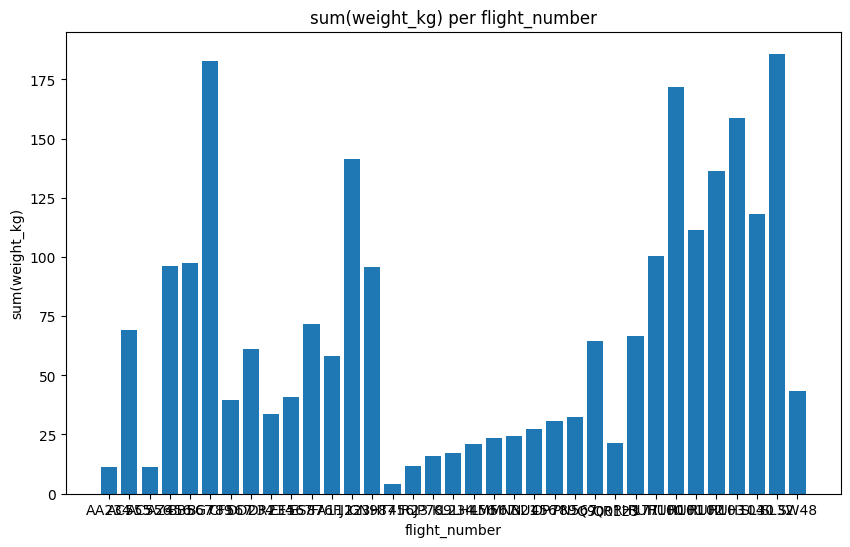

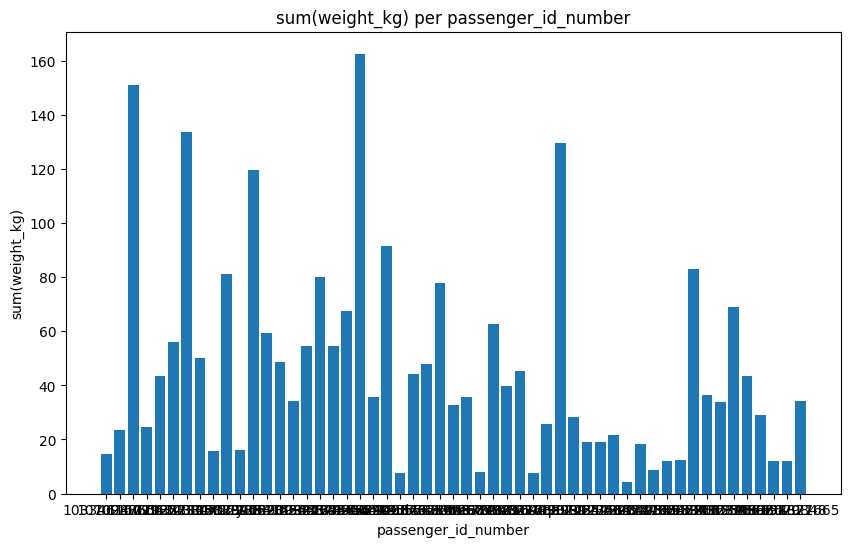

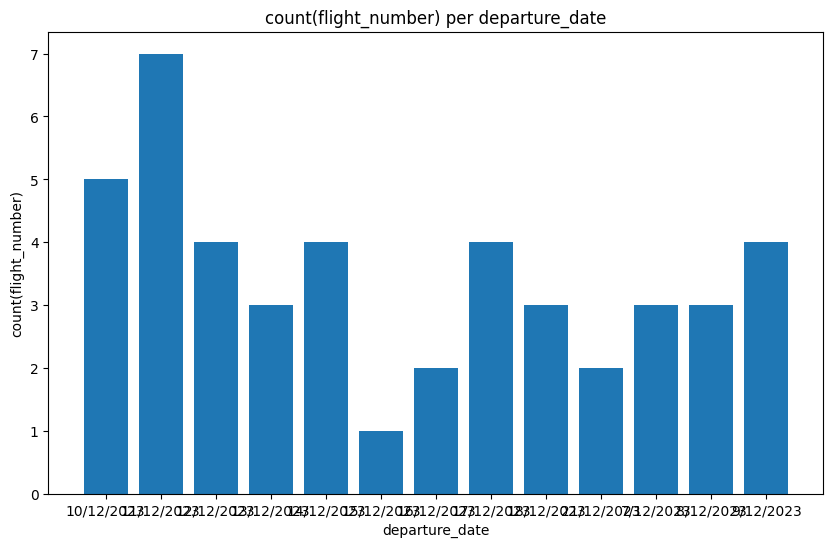

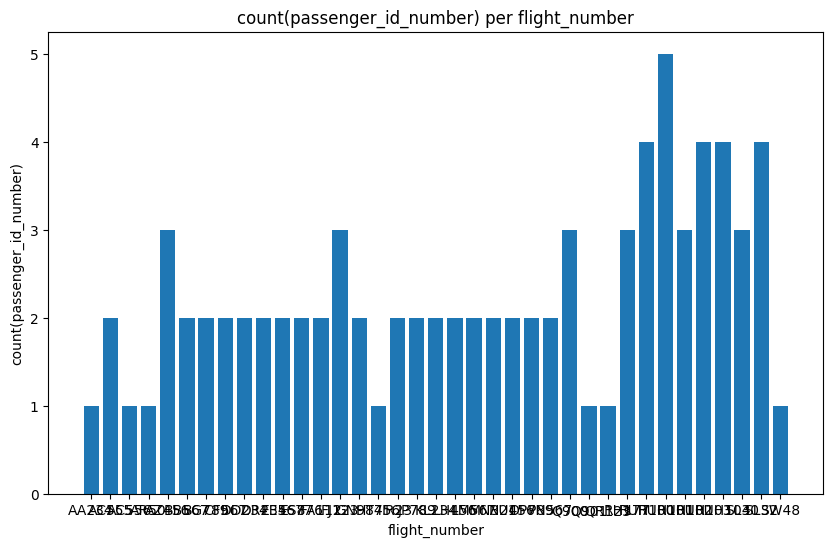

In [32]:
displayAggregatePlot(data_file, grouping_columns=['flight_number', 'flight_date'],  arregate_column='weight_kg', operator='sum', table='Luggage')
displayAggregatePlot(data_file, grouping_columns=['passenger_id_number'],  arregate_column='weight_kg', operator='sum', table='Luggage')
displayAggregatePlot(data_file, grouping_columns=['departure_date'],  arregate_column='flight_number', operator='count', table='FlightInfo')
displayAggregatePlot(data_file, grouping_columns=['flight_number', 'flight_date'],  arregate_column='passenger_id_number', operator='count', table='passengerFlight')

###example use for tickets

In [33]:
result = passengerFlightInfo(data_file, flight_date='14/12/2023')
printTable(result,  column_names=['passenger_id_number', 'first_name', 'last_name', 'seat_number',
                                      'flight_number', 'departure_date', 'departure_time'])

passenger_id_number,first_name,last_name,seat_number,flight_number,departure_date,departure_time
678901234,Fizzy,Sparklepaws,J34,LH456,14/12/2023,08:30
5432we987,Oliver,Puddlejumper,H32,LH456,14/12/2023,08:30
111222333,Misty,Cloudjumper,K36,Q900,14/12/2023,17:23
543210987,Doodle,Dandybrush,A19,Q900,14/12/2023,17:23
789012345,Purrfect,Harmony,B21,Q900,14/12/2023,17:23
123987456,Max,Thunderpaws,H23,RUH100,14/12/2023,21:30
567890123,Minnie,Feathertail,B11,RUH100,14/12/2023,21:30
887766554,Whiskington,Furrington,G21,RUH100,14/12/2023,21:30
890123456,Twixie,Whiskerjoy,C13,RUH100,14/12/2023,21:30
123456789,John,Smiggles,D15,RUH101,14/12/2023,05:55


###example use for weightLimit

In [34]:
printTable(weightLimit(data_file, limit=35, flight_number='all', flight_date='14/12/2023'), column_names=['luggage_tag_id', 'weight_kg', 'passenger_id_number',
                              'first_name', 'last_name', 'phone_number', 'email', 'flight_number', 'flight_date'])

luggage_tag_id,weight_kg,passenger_id_number,first_name,last_name,phone_number,email,flight_number,flight_date
2000002,14.9015,678901234,Fizzy,Sparklepaws,(123) 678-9012,fizzy.sparklepaws@example.com,LH456,14/12/2023
2000005,15.089,678901234,Fizzy,Sparklepaws,(123) 678-9012,fizzy.sparklepaws@example.com,LH456,14/12/2023
2000019,14.5942,543210987,Doodle,Dandybrush,(123) 543-2109,doodle.dandybrush@example.com,Q900,14/12/2023
2000021,45.4053,543210987,Doodle,Dandybrush,(123) 543-2109,doodle.dandybrush@example.com,Q900,14/12/2023
2000027,34.6349,123456789,John,Smiggles,(123) 123-4567,john.smiggles@example.com,RUH101,14/12/2023
2000047,18.605,123456789,John,Smiggles,(123) 123-4567,john.smiggles@example.com,RUH101,14/12/2023
2000078,37.5266,123456789,John,Smiggles,(123) 123-4567,john.smiggles@example.com,RUH101,14/12/2023
2000079,24.6921,567890123,Minnie,Feathertail,(123) 456-1111,minnie.feathertail@example.com,RUH100,14/12/2023
2000082,37.937,567890123,Minnie,Feathertail,(123) 456-1111,minnie.feathertail@example.com,RUH100,14/12/2023
2000100,33.9454,678901234,Fizzy,Sparklepaws,(123) 678-9012,fizzy.sparklepaws@example.com,LH456,14/12/2023


---
---
# **Section 4: Automated testing**

## Test definitions **(DO NOT MODIFY)**
This block defines unit tests which we will apply to your code.

### **Do not modify this block, as we will replace its contents with a fresh copy when executing your code.**

Please execute this block to load the definitions and then skip to the "Run tests" section below.

In [35]:
import unittest

class TestRequiredOperations(unittest.TestCase):

  def _testDictOfLists(self, result, func):
    # Test if this is a dictionary
    self.assertIsInstance(result, dict,
                          msg="Result of {0} must be a dictionary, got {1}".format(func, type(result)))

    # Test that each key is a string and each value is a list
    for (col_name, col_values) in result.items():
      self.assertIsInstance(col_name, str,
                            msg="Keys of {0} dictionary must be string column names, got {1}".format(func, type(col_name)))
      self.assertIsInstance(col_values, list,
                            msg="Values of {0} dictionary must be lists, got {1}".format(func, type(col_values)))

  def test_getNumericColumns(self):
    result = getNumericColumns(data_file)

    self._testDictOfLists(result, 'getNumericColumns')

    for (col_name, col_values ) in result.items():
      # Test that each value is numeric
      for value in col_values:
        self.assertTrue(
            (type(value) is int)
            or (type(value) is float),
            msg='Numeric column {0}: Value {1} is stored as type {2}, not numeric'.format(col_name, value, type(value))
        )

  def test_getFreeTextColumns(self):
    result = getFreeTextColumns(data_file)

    self._testDictOfLists(result, 'getFreeTextColumns')

    for (col_name, col_values) in result.items():
      # Test that each value is numeric
      for value in col_values:
        self.assertIsInstance(value, str,
                              msg="Free-text column {0}: Value {1} is stored as type {2}, not string".format(col_name, value, type(value)))

  def test_getCategoricalColumns(self):
    result = getCategoricalColumns(data_file)

    self._testDictOfLists(result, 'getCategoricalColumns')

    found_at_least_three_values_at_least_once = False

    for (col_name, col_values) in result.items():
      # Count up value frequencies
      value_freqs = {}
      for value in col_values:
        # Ensure that values are either int or string
        self.assertTrue(
            (type(value) is int)
            or (type(value) is str),
            msg='Categorical column {0}: value {1} is stored as type {2}, not valid for categorical'.format(col_name, value, type(value))
        )
        value_freqs[value] = value_freqs.get(value, 0) + 1

      if len(value_freqs) >= 3:
        found_at_least_three_values_at_least_once = True

    self.assertTrue(found_at_least_three_values_at_least_once,
                    msg="No categorical columns found that include at least 3 unique values")


  def test_getAllRows(self, table_name='MAIN'):
    result = getAllRows(data_file)

    max_nrow = 0

    self.assertIsInstance(result, dict,
                          msg='Result of getAllRows must be a dict, got {0}'.format(type(result)))
    # Test each one individually
    for (tbl_name, tbl) in result.items():
      # Make sure the table is a list
      self.assertIsInstance(tbl, list,
                            msg="Table {0}: must be stored as a list, got type {1}".format(tbl_name, type(tbl)))

      # Make sure each item in the list is a dict (data row)
      for i in range(len(tbl)):
        row = tbl[i]

        self.assertIsInstance(row, dict,
                              msg="Table {0} Row {1}: each element must be stored as a dict, got type {2}".format(tbl_name, i, type(row)))

        # Make sure each key/value pair in the dict (col header/value) is a string and atomic type
        for (col_name, col_value) in row.items():
          self.assertIsInstance(col_name, str,
                                msg="Table {0} Row {1}: column headers must be stored as str, got type {2}".format(tbl_name, i, type(col_name)))
          self.assertTrue(
              (not (type(col_value) is list))
              and (not (type(col_value) is dict))
              and (not (type(col_value) is tuple)),
              msg="Table {0} Row {1}: column values must be atomic, got type {2}".format(tbl_name, i, type(col_value))
          )

      max_nrow = max(max_nrow, len(tbl))

    self.assertGreaterEqual(max_nrow, 3, msg='Database must have at least one table with 3 or more rows, found max {0}'.format(max_nrow))

---
## Run tests **(FOR YOU TO EXECUTE)**

The block below calls the unit tests defined in the "Test definitions" section on your implementations for the functions in ."Required functions".

**Please use this code to test your implementations. Your code should pass all tests when you have implemented the specified behaviours described in the "Automated testing applied" section.**

**NOTE: You will need to update `data_file` to refer to the correct data file for your implementation.**

### Do not modify the test definitions above to make your code pass. If your code is not passing the tests, modify your implementation to correct the issue(s).

In [36]:
data_file = '230190159.db'

_ = unittest.main(argv=[''], verbosity=2, exit=False)

test_getAllRows (__main__.TestRequiredOperations) ... ok
test_getCategoricalColumns (__main__.TestRequiredOperations) ... ok
test_getFreeTextColumns (__main__.TestRequiredOperations) ... ok
test_getNumericColumns (__main__.TestRequiredOperations) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.081s

OK
